In [5]:
#Series as one-dim array
import pandas as pd
import numpy as np

In [6]:
#indexing 取值(arr[2,1]),slicing 切片(arr[:,1:5]),masking 掩码操作(arr[arr>0]),fancy indexing(arr[0,[1,5]])，conbinitions thereof(arr[：，[1,5])

#### series的数据选取

In [7]:
#关于Series 记住它表现的像numpy array 和 dictionary,对这些的操作能运用到Series
#dictionary like
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data['b'],'a' in data,data.keys(),list(data.items())
data['e'] = 1.25

In [8]:
#array like
#slicing by implicit index
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
# 显示索引,右边是包含的。
data['a':'c']
# 隐式索引，右边不包含。
data[0:2]
#mask
data[(data>0.3)&(data<0.8)]

b    0.50
c    0.75
dtype: float64

In [9]:
#fancy indexing
data[['a','d']]

a    0.25
d    1.00
dtype: float64

# indexers:loc,iloc,ix
1. 当使用显示索引切片时，data['a','f']右边的索引是包含的；使用隐式索引时data[0:2]右边的索引不包含；
2. 当显示索引是整数时，切片会使用隐式索引；但是取值时会采用显式索引。
3. 切片时如果用的是显示索引，那么右边的索引包含，否则不包含。

In [10]:
#some confusions
data = pd.Series(['a','b','c'],index=[1,3,5])
data

1    a
3    b
5    c
dtype: object

In [11]:
#explicit index when indexing
data[1]

'a'

In [12]:
#implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

因为整数索引可能造成这样的迷惑，pandas提供了特殊的indexers属性的索引

In [13]:
#loc属性关联到显式的索引
data.loc[1]

'a'

In [14]:
data.loc[1:3]

1    a
3    b
dtype: object

In [15]:
#iloc属性关联到隐式的索引
data.iloc[1]

'b'

In [16]:
data.iloc[1:3]

3    b
5    c
dtype: object

# Data Selection in DataFrame

记住可以从两种角度看待dataframe，一种是二维数组，另一种是由Series构成的字典

In [17]:
#DataFrame as a dictionary
area = pd.Series({'California': 423967, 'Texas': 695662,
                'New York': 141297, 'Florida': 170312,
                'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                'New York': 19651127, 'Florida': 19552860,
                'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [18]:
data['area']
#属性索引不是通用的，当列名不是纯字符串或者与方法名相同时，不能用属性索引
#另外不要data.col = z去赋值
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [19]:
data['density'] = data['pop']/data['area']

In [20]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [21]:
#DataFrame as two-dimensional array

In [22]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [23]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [24]:
#隐式索引 position based indexing
data.iloc[:3,:2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [25]:
#显式索引 label based indexing
data.loc[:'Illinois',:'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [26]:
#The ix indexer allows a hybrid of these two approaches:
data.ix[:3,:'pop']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [27]:
data.loc[data.density>100,['pop','density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


# Operating on Data in Pandas

# Ufuncs:index preservation

NumPy ufunc will work on Pandas Series and DataFrame objects
我们可以对Series和DataFrame执行numpy的函数，返回的是另外的对象但是索引被保存下来

In [28]:
import pandas as pd
import numpy as np
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0,10,4))

In [29]:
df = pd.DataFrame(rng.randint(0,10,(3,4)),columns=['a','b','c','d'])

In [30]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [31]:
np.sin(df+4)

,a,b,c,d
0,-0.544021,0.420167,-0.279415,-0.544021
1,-0.999990,0.989358,0.656987,-0.999990
2,-0.999990,-0.279415,0.412118,0.989358


## UFuncs: Index Alignment

对二元操作来说，pandas会将索引自动对齐，这在数据量不全的时候很有帮助。

In [32]:
#UFuncs: Index Alignment
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                    'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                    'New York': 19651127}, name='population')
population/area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [33]:
A = pd.Series([2, 4, 6], index=[0, 1, 2]) 
B = pd.Series([1, 3, 5], index=[1, 2, 3]) 
A+B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

如果想要填充空值，可以使用对象方法来替代操作符

In [34]:
A.add(B,fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [35]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                columns=list('BAC'))
A+B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [36]:
fill = A.stack().mean()
fill

4.5

In [37]:
A.add(B,fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


# python操作符和对应的pandas对象方法

## Ufuncs: Operations Between DataFrame and Series

In [38]:
#根据broadcasting rules,subtraction between a two-dimensional array and one of its rows is applied row-wise
A = rng.randint(10, size=(3, 4))
A-A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [39]:
#In Pandas, the convention similarly operates row-wise by default
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]
#if you would like to operate column-wise,axis = 0
df.sub(df['R'],axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [40]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [41]:
half = df.iloc[0,::2]
half

Q    3
S    2
Name: 0, dtype: int64

In [42]:
df -half

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


# Handling Missing Data

## None: Pythonic missing data

In [43]:
#None is a object 如果在数组中有none,那么它是object类型
vals = np.array([1,None,3,4])

In [44]:
#所以不能执行聚合操作
#vals.sum()

# NaN:Missing numerical data

In [45]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [46]:
#it is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation

In [47]:
#和nan值进行的算数运算返回的结果都是nan
1+np.nan

nan

In [48]:
#可以执行聚合操作，但是得不到想要的结果
vals2.sum()

nan

In [49]:
#如果想要忽略nan值
np.nansum(vals2)

8.0

In [50]:
#自动类型转换float64 
pd.Series([1,np.nan,2,None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [51]:
#会将None值转化为NaN
x = pd.Series(range(2),dtype=int)
x[0] = None
x

0    NaN
1    1.0
dtype: float64

In [52]:
#detecting null values
data = pd.Series([1,np.nan,'hello',None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [53]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [54]:
#dropping null values
data.dropna()
#for dataframe 我们不能删除单个null值，我们只能删除整行或者整列
df = pd.DataFrame([[1,      np.nan, 2],
                  [2,      3,      5],
                [np.nan,4,6]])
#how默认参数是any,也就是某行或者某列只要含有Null值就删除
#axis默认参数是删除行，参数axis=1 or axis = 'columns'删除列
df.dropna()
#how=all 整行或整列全是null值才删除
#thresh参数可以控制某一行或者某一列最少的非空值数量

,0,1,2
1,2.0,3.0,5


In [55]:
#filling null value
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data.fillna(0)#返回的是一个新的对象

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [56]:
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [57]:
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

# Combining Datasets:Contat and Append

In [58]:
def make_df(cols,ind):
    data = {c:[str(c)+str(i) for i in ind]for c in cols}
    return pd.DataFrame(data,ind)

In [59]:
#recall concatenation of numpy arrays
x= [1,2,3]
y= [4,5,6]
z= [7,8,9]
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [60]:
df = make_df('AB',[0,1])
df2 = make_df('CD',[0,1])
pd.concat([df,df2],axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


In [61]:
pd.concat([df,df2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1


#### 索引是重复的

In [62]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index
pd.concat([x,y])

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [63]:
#但是索引重复并不是我们想要的，所以捕捉索引重复的错误
try:
    pd.concat([x,y],verify_integrity=True)
except ValueError as e:
    print(e)

Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [64]:
# 如果不想要重复的索引，那么设置此参数
pd.concat([x,y],ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [65]:
#还有一种方法就是通过keys参数为数据源设置多级索引标签
pd.concat([x,y],keys=['x','y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

#### 类似join的合并

In [66]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
pd.concat([df5,df6],join='inner')#默认join='outer'

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [67]:
# join_axes 确定结果使用的列名
pd.concat([df5,df6],join_axes=[df5.columns])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


In [68]:
#为合并后的数据创建一个一个新对象
df5.append(df6)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


# Combining Datasets: Merge and Join

#### pd.merge()

In [69]:
#one to one
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                        'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [70]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [71]:
df3 = pd.merge(df1,df2) #默认以相同的列作为连接键

In [72]:
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [73]:
#many to one joins
#是指在连接的两个列中，在一个表中的列有重复，那么在那个没有重复列的那个表中，其他的字段也会相应重复
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3,df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [74]:
#many to many
df5 = pd.DataFrame({'group':['Accounting','Accounting','Engineering','Engineering','HR'],'skills':['math','spreadsheets','coding','spreadsheets','roganization']})

In [75]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,spreadsheets
4,Lisa,Engineering,coding
5,Lisa,Engineering,spreadsheets
6,Sue,HR,roganization


In [76]:
#on 只能在有共同列名的时候使用
pd.merge(df1,df2,on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [77]:
#left_on and right_on 当需要连接字段的列名不同时
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]}) 
print(df1); print(df3);print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [78]:
#the left_index and right_index 
#除了合并列以外还可以合并索引

In [79]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
pd.merge(df1a,df2a,left_index=True,right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [80]:
# join performs a merge that defaults to joining on indices
# join 默认按照索引进行数据合并
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [82]:
# 索引也可以和列混合使用，左边的索引和右边的列当作键来合并
pd.merge(df1a,df3,left_index=True,right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


In [83]:
# 默认是inner连接
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
columns=['name', 'drink'])

In [84]:
pd.merge(df6,df7,how='outer') 

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [85]:
# 连接时除了键之外还有相同的列，会自动增加后缀_x和_y
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                                'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
pd.merge(df8,df9,on='name',suffixes=['_L','_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [125]:
df9.query("name == 'Bob' & rank == 3")

,name,rank
0,Bob,3


In [ ]:
#对行和列筛选
merged.loc[merged['state'].isnull(),'state/region'] #先选行再选列
final['state'][final['area'].isnull()]#先选列再选行

# Aggregation and Grouping

In [86]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [87]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [88]:
#count(),first(),last(),mean(),median(),min(),max(),std(),var(),mad(),product(),sum()

## GroupBy: Split, Apply, Combine

In [89]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data':range(6)},columns=['key','data'])
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [90]:
#按列取值
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [91]:
# Iteration over groups 支持按组迭代
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method,group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [131]:
# 调用方法
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


## Aggregation

In [92]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data1': range(6),'data2': rng.randint(0, 10, 6)},columns = ['key', 'data1', 'data2'])

In [93]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [94]:
# GroupBy aggregations with sum(), median(), and the like, but the aggregate() method allows for even more flexibility
# 这个函数更灵活更复杂，支持字符串、函数、或者函数列表

In [95]:
df.groupby('key').aggregate(['min',np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [96]:
# 还可以对不同的列应用不同的函数
df.groupby('key').aggregate({'data1':'min','data2':'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


## Filtering

In [97]:
def filter_func(x):
    return x['data2'].std()> 4
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [98]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [99]:
df.groupby('key').filter(filter_func) #把满足条件的保留下来

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


## Transforation

In [100]:
df.groupby('key').transform(lambda x:x-x.mean())#实现数据标准化

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


## apply

In [101]:
df.groupby('key').apply(sum)

,key,data1,data2
key,,,
A,AA,3,8
B,BB,5,7
C,CC,7,12


In [133]:
#输入df,返回处理后的df
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


#### 设置分割的键

In [102]:
#A list, array, series, or index providing the grouping keys
L = [0,1,0,1,2,0]
df.groupby(L).sum()
#将列表、数组、Series可以作为分组键，效果其实就是让它替换索引

,data1,data2
0,7,17
1,4,3
2,4,7


In [103]:
#A dictionary or series mapping index to group
#用字典或Series将索引映射到分组名称。
df2 = df.set_index('key')
mapping = {'A':'vowel','B':'consonant','C':'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,19
vowel,3,8


In [104]:
#Any Python functio 函数映射到索引
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [105]:
# A list of valid keys 多个有效键构成的列表，返回多级索引
df2.groupby([str.lower,mapping]).mean()

,,data1,data2
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


#### 向量化字符串操作

In [106]:
#vectorized string operations
#numpy 不提供字符串的向量化，并且不能包含none
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names.str.capitalize() #缺失值会被跳过

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [107]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                              'Eric Idle', 'Terry Jones', 'Michael Palin'])


In [139]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

#### 与python字符串相似的方法

#### 使用正则表达式的方法

In [138]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [140]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')#找到非原音开头和结尾

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

#### 其他字符串方法
get() slice() join() get_dummies()

In [141]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [109]:
full_monte = pd.DataFrame({'name': monte,'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C','B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [110]:
# amazing function by fuqig
# 假设一个公司有多个投资人类别，并且在字段里包含多个值，那么可以用这个方法
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


# 时间序列数据

#### python原生的数据类型

In [142]:
from datetime import datetime
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [143]:
from dateutil import parser
date = parser.parse("4th of july,2015")

#### numpy的数组

In [144]:
import numpy as np
date = np.array('2015-07-04',dtype=np.datetime64)

In [145]:
date+ np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

#### pandas的时间
结合numpy.datetime64的有效存储和向量化接口将datetime和dateutil的易用性结合起来

In [112]:
date = pd.to_datetime("4th of july,2015")
date

Timestamp('2015-07-04 00:00:00')

In [113]:
date.strftime('%A')

'Saturday'

In [114]:
date+pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

#### 用时间作索引

In [146]:
index = pd.DatetimeIndex(['2014-05-03'])
data = pd.Series([0],index=index)

In [115]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                                   '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [116]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [117]:
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [118]:
pd.date_range('2018-07-01','2018-08-01')

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01'],
              dtype='datetime64[ns]', freq='D')

#### 为了能简便地创建有规律的时间序列，pandas提供了一些方法：
pd.date_range() 处理时间戳
pd.period_range() 处理周期
pd.timedelta_range() 处理时间间隔

In [119]:
pd.date_range('2018-07-01',periods=8)

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08'],
              dtype='datetime64[ns]', freq='D')

In [120]:
pd.date_range('2018-07-01',periods=8,freq='H')

DatetimeIndex(['2018-07-01 00:00:00', '2018-07-01 01:00:00',
               '2018-07-01 02:00:00', '2018-07-01 03:00:00',
               '2018-07-01 04:00:00', '2018-07-01 05:00:00',
               '2018-07-01 06:00:00', '2018-07-01 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [121]:
pd.period_range('2015-08',periods=8,freq='H')

PeriodIndex(['2015-08-01 00:00', '2015-08-01 01:00', '2015-08-01 02:00',
             '2015-08-01 03:00', '2015-08-01 04:00', '2015-08-01 05:00',
             '2015-08-01 06:00', '2015-08-01 07:00'],
            dtype='period[H]', freq='H')

In [122]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

#### 时间频率和偏移量

In [147]:
pd.timedelta_range(0,periods=9,freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [148]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01',periods=5,freq=BDay())


DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

#### 重新取样、迁移、和窗口

In [156]:
from pandas_datareader import data
goog = data.DataReader('GOOG',start='2010',end='2020',data_source='yahoo')

In [159]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-14,1140.420044,1119.550049,1137.209961,1120.439941,1836600.0,1120.439941
2019-05-15,1171.329956,1116.666016,1117.869995,1164.209961,2289300.0,1164.209961
2019-05-16,1188.160034,1162.839966,1164.510010,1178.979980,1531400.0,1178.979980
2019-05-17,1180.150024,1160.010010,1168.469971,1162.300049,1208600.0,1162.300049
2019-05-20,1146.796997,1131.442993,1144.500000,1138.849976,1357200.0,1138.849976


In [160]:
goog = goog['Close']

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set()

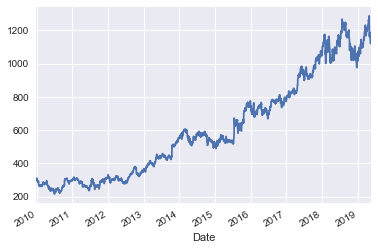

In [163]:
goog.plot()

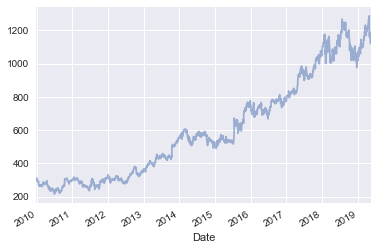

In [165]:
goog.plot(alpha=0.5,style='-')

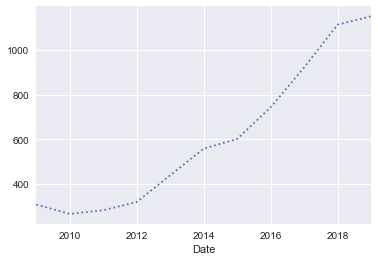

In [169]:
goog.resample('BA').mean().plot(style=':')#每一年的均值

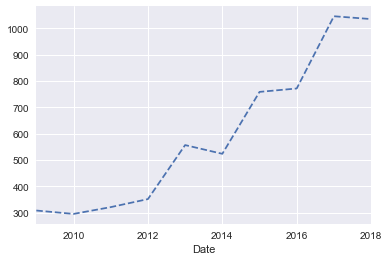

In [167]:
goog.asfreq('BA').plot(style='--')#每一年的最后一个工作日

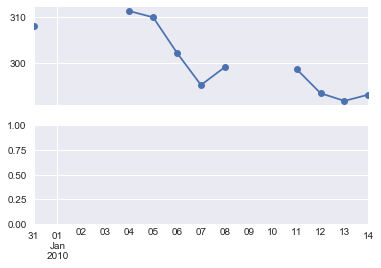

In [170]:
fig,ax = plt.subplots(2,sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0],marker='o')

In [172]:
# 对数据按时间迁移 shift() tshift() 

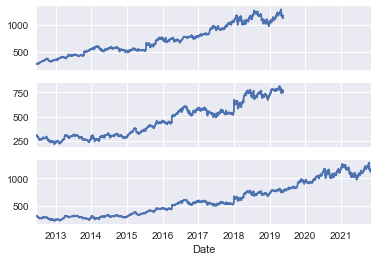

In [174]:
fix,ax = plt.subplots(3,sharex=True)
goog = goog.asfreq('D',method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

In [175]:
#移动时间窗口 rolling()
rolling = goog.rolling(356)